In [1]:
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt
import pandas_profiling
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
pd.options.display.max_columns=100

In [2]:
# Reading the Dataset
dft = pd.read_csv('./train.csv')

In [3]:
dft.dtypes

reservation_id                         object
booking_date                           object
checkin_date                           object
checkout_date                          object
channel_code                            int64
main_product_code                       int64
numberofadults                          int64
numberofchildren                        int64
persontravellingid                      int64
resort_region_code                      int64
resort_type_code                        int64
room_type_booked_code                   int64
roomnights                              int64
season_holidayed_code                 float64
state_code_residence                  float64
state_code_resort                       int64
total_pax                               int64
member_age_buckets                     object
booking_type_code                       int64
memberid                               object
cluster_code                           object
reservationstatusid_code          

In [4]:
# Pandas data profiling
h_prof = pandas_profiling.ProfileReport(dft)
h_prof.to_file(outputfile="TrainProfileoutput.html")

In [5]:
dft['bookingDat']=dft['booking_date'].apply(lambda k:k.split('/')[0]+'-'+k.split('/')[1]+'-20'+k.split('/')[2])
dft[['booking_date','bookingDat']].head(10)

,booking_date,bookingDat
0,05/04/18,05-04-2018
1,23/01/15,23-01-2015
2,28/01/15,28-01-2015
3,02/05/15,02-05-2015
4,02/09/15,02-09-2015
5,01/12/15,01-12-2015
6,20/01/16,20-01-2016
7,22/08/16,22-08-2016
8,10/09/16,10-09-2016
9,03/08/16,03-08-2016


In [6]:
import datetime as dt
dft['bookingDt']=dft['bookingDat'].apply(lambda k:dt.datetime.strptime(k, '%d-%m-%Y'))

In [7]:
dft[['booking_date','bookingDt']].head()

,booking_date,bookingDt
0,05/04/18,2018-04-05
1,23/01/15,2015-01-23
2,28/01/15,2015-01-28
3,02/05/15,2015-05-02
4,02/09/15,2015-09-02


In [8]:
dft['checkinDat']=dft['checkin_date'].apply(lambda k:k.split('/')[0]+'-'+k.split('/')[1]+'-20'+k.split('/')[2])
dft['checkinDt']=dft['checkinDat'].apply(lambda k:dt.datetime.strptime(k, '%d-%m-%Y'))

In [9]:
dft['checkoutDat']=dft['checkout_date'].apply(lambda k:k.split('/')[0]+'-'+k.split('/')[1]+'-20'+k.split('/')[2])
dft['checkoutDt']=dft['checkoutDat'].apply(lambda k:dt.datetime.strptime(k, '%d-%m-%Y'))
dft[['checkout_date','checkoutDt']].head()

,checkout_date,checkoutDt
0,06/04/18,2018-04-06
1,16/04/15,2015-04-16
2,05/02/15,2015-02-05
3,16/06/15,2015-06-16
4,19/12/15,2015-12-19


In [10]:
def daysCal(bdt,cdt):
    return ((bdt-cdt).days)*-1

dft['PreBookDays'] = dft.apply(lambda row:daysCal(row['bookingDt'],row['checkinDt']),axis = 1)

In [11]:
dft[['bookingDt','checkinDt','PreBookDays']].head(20)

,bookingDt,checkinDt,PreBookDays
0,2018-04-05,2018-04-05,0
1,2015-01-23,2015-04-11,78
2,2015-01-28,2015-02-01,4
3,2015-05-02,2015-06-11,40
4,2015-09-02,2015-12-14,103
5,2015-12-01,2016-01-12,42
6,2016-01-20,2016-01-20,0
7,2016-08-22,2016-10-20,59
8,2016-09-10,2016-09-18,8
9,2016-08-03,2016-11-21,110


In [12]:
def daysSpent(cidt,codt):
    return ((cidt-codt).days)*-1

dft['DaysSpent'] = dft.apply(lambda row:daysCal(row['checkinDt'],row['checkoutDt']),axis = 1)

In [13]:
dft[['checkinDt','checkoutDt','DaysSpent']].head(10)

,checkinDt,checkoutDt,DaysSpent
0,2018-04-05,2018-04-06,1
1,2015-04-11,2015-04-16,5
2,2015-02-01,2015-02-05,4
3,2015-06-11,2015-06-16,5
4,2015-12-14,2015-12-19,5
5,2016-01-12,2016-01-13,1
6,2016-01-20,2016-01-21,1
7,2016-10-20,2016-10-25,5
8,2016-09-18,2016-09-24,6
9,2016-11-21,2016-11-24,3


In [14]:
dft.head()

,reservation_id,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,memberid,cluster_code,reservationstatusid_code,resort_id,amount_spent_per_room_night_scaled,bookingDat,bookingDt,checkinDat,checkinDt,checkoutDat,checkoutDt,PreBookDays,DaysSpent
0,07659f3758d8aee27f5a7e2887adeacb67021cb95ada1b...,05/04/18,05/04/18,06/04/18,3,1,2,0,46,3,3,3,1,2.0,7.0,3,3,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,C,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,7.706428,05-04-2018,2018-04-05,05-04-2018,2018-04-05,06-04-2018,2018-04-06,0,1
1,03930f033646d073462b35d411616323597715ac4fc398...,23/01/15,11/04/15,16/04/15,1,1,2,0,46,3,3,4,5,2.0,7.0,5,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,A,39fa9ec190eee7b6f4dff1100d6343e10918d044c75eac...,6.662563,23-01-2015,2015-01-23,11-04-2015,2015-04-11,16-04-2015,2015-04-16,78,5
2,d145a32920e6587ad95bfe299d80c0affa268220535aaf...,28/01/15,01/02/15,05/02/15,1,1,2,0,47,1,5,4,4,2.0,7.0,1,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,E,A,535fa30d7e25dd8a49f1536779734ec8286108d115da50...,7.871602,28-01-2015,2015-01-28,01-02-2015,2015-02-01,05-02-2015,2015-02-05,4,4
3,cfd77f44811ed62f25a220b53324cdbafc662a4c9e5f04...,02/05/15,11/06/15,16/06/15,1,1,2,2,46,2,2,3,5,2.0,7.0,2,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,5.344943,02-05-2015,2015-05-02,11-06-2015,2015-06-11,16-06-2015,2015-06-16,40,5
4,937cff9e4dcfc2459620153dfc8b9962ac22bea67dfb29...,02/09/15,14/12/15,19/12/15,1,1,2,0,46,2,2,4,5,2.0,7.0,2,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,7.059346,02-09-2015,2015-09-02,14-12-2015,2015-12-14,19-12-2015,2015-12-19,103,5


In [15]:
dft.drop(dft[dft.PreBookDays < 0].index, inplace=True)

In [16]:
dft['PreBookDays'].unique()

array([  0,  78,   4,  40, 103,  42,  59,   8, 110,  25,  68,   1,  71,
        67,  55,  62,  20,  16,  11,   5,  34,  12, 116,  13,   9,  24,
        49,  51,  85,  43,  23,   3,  56,  29,  26,  18,  88,  39, 108,
       111, 113, 117, 115,  98, 114,  21,  94,   6,  70,  73,  17,  19,
        15,  99, 102,  44,  22,  48,  76,  14,   2,  79,  37,  30,  53,
        63,   7,  65,  47, 119,  97,  93,  91, 104,  81,  31, 112, 120,
       107, 122,  72,  95,  50,  96,  10, 106,  27,  87,  84,  89,  33,
        64,  60, 118, 121,  80,  66,  41, 101,  35,  57, 105,  75,  77,
        92,  90, 100,  28,  46,  86,  36,  54,  83,  45,  82,  74,  32,
       109,  52,  38,  58,  69,  61, 123, 124, 125, 126], dtype=int64)

In [17]:
def prebookdays_conv(d):
    if d <= 30:
        return 1
    elif 30 < d <= 60:
        return 2
    elif 60 < d  <= 90:
        return 3
    elif 90 < d <= 120:
        return 4
    else:
        return 5
    
dft['prebookdays_conv'] = dft['PreBookDays'].apply(lambda k : prebookdays_conv(k))        

In [18]:
dft[['PreBookDays','prebookdays_conv']].head(10)

,PreBookDays,prebookdays_conv
0,0,1
1,78,3
2,4,1
3,40,2
4,103,4
5,42,2
6,0,1
7,59,2
8,8,1
9,110,4


In [19]:
lb = LabelEncoder()
dft['resort_id_conv'] = lb.fit_transform(dft['resort_id'])
dft[['resort_id','resort_id_conv']].head(10)

,resort_id,resort_id_conv
0,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,7
1,39fa9ec190eee7b6f4dff1100d6343e10918d044c75eac...,1
2,535fa30d7e25dd8a49f1536779734ec8286108d115da50...,9
3,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,25
4,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,25
5,b17ef6d19c7a5b1ee83b907c595526dcb1eb06db8227d6...,22
6,ff5a1ae012afa5d4c889c50ad427aaf545d31a4fac04ff...,31
7,b17ef6d19c7a5b1ee83b907c595526dcb1eb06db8227d6...,22
8,0b918943df0962bc7a1824c0555a389347b4febdc7cf9d...,0
9,535fa30d7e25dd8a49f1536779734ec8286108d115da50...,9


In [20]:
dft.head()

,reservation_id,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,memberid,cluster_code,reservationstatusid_code,resort_id,amount_spent_per_room_night_scaled,bookingDat,bookingDt,checkinDat,checkinDt,checkoutDat,checkoutDt,PreBookDays,DaysSpent,prebookdays_conv,resort_id_conv
0,07659f3758d8aee27f5a7e2887adeacb67021cb95ada1b...,05/04/18,05/04/18,06/04/18,3,1,2,0,46,3,3,3,1,2.0,7.0,3,3,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,C,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,7.706428,05-04-2018,2018-04-05,05-04-2018,2018-04-05,06-04-2018,2018-04-06,0,1,1,7
1,03930f033646d073462b35d411616323597715ac4fc398...,23/01/15,11/04/15,16/04/15,1,1,2,0,46,3,3,4,5,2.0,7.0,5,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,A,39fa9ec190eee7b6f4dff1100d6343e10918d044c75eac...,6.662563,23-01-2015,2015-01-23,11-04-2015,2015-04-11,16-04-2015,2015-04-16,78,5,3,1
2,d145a32920e6587ad95bfe299d80c0affa268220535aaf...,28/01/15,01/02/15,05/02/15,1,1,2,0,47,1,5,4,4,2.0,7.0,1,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,E,A,535fa30d7e25dd8a49f1536779734ec8286108d115da50...,7.871602,28-01-2015,2015-01-28,01-02-2015,2015-02-01,05-02-2015,2015-02-05,4,4,1,9
3,cfd77f44811ed62f25a220b53324cdbafc662a4c9e5f04...,02/05/15,11/06/15,16/06/15,1,1,2,2,46,2,2,3,5,2.0,7.0,2,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,5.344943,02-05-2015,2015-05-02,11-06-2015,2015-06-11,16-06-2015,2015-06-16,40,5,2,25
4,937cff9e4dcfc2459620153dfc8b9962ac22bea67dfb29...,02/09/15,14/12/15,19/12/15,1,1,2,0,46,2,2,4,5,2.0,7.0,2,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,7.059346,02-09-2015,2015-09-02,14-12-2015,2015-12-14,19-12-2015,2015-12-19,103,5,4,25


In [21]:
dft[dft['state_code_residence'].isnull() == True].dropna(inplace = True)

c:\program files (x86)\python36-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [22]:
dft[dft['state_code_resort'].isnull() == True].head()

,reservation_id,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,memberid,cluster_code,reservationstatusid_code,resort_id,amount_spent_per_room_night_scaled,bookingDat,bookingDt,checkinDat,checkinDt,checkoutDat,checkoutDt,PreBookDays,DaysSpent,prebookdays_conv,resort_id_conv


In [23]:
dft['season_holidayed_code'].fillna(dft['season_holidayed_code'].mode()[0],inplace = True)

In [24]:
dft['state_code_residence'].fillna(dft['state_code_residence'].mode()[0],inplace = True)

In [25]:
dft.head()

,reservation_id,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,memberid,cluster_code,reservationstatusid_code,resort_id,amount_spent_per_room_night_scaled,bookingDat,bookingDt,checkinDat,checkinDt,checkoutDat,checkoutDt,PreBookDays,DaysSpent,prebookdays_conv,resort_id_conv
0,07659f3758d8aee27f5a7e2887adeacb67021cb95ada1b...,05/04/18,05/04/18,06/04/18,3,1,2,0,46,3,3,3,1,2.0,7.0,3,3,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,C,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,7.706428,05-04-2018,2018-04-05,05-04-2018,2018-04-05,06-04-2018,2018-04-06,0,1,1,7
1,03930f033646d073462b35d411616323597715ac4fc398...,23/01/15,11/04/15,16/04/15,1,1,2,0,46,3,3,4,5,2.0,7.0,5,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,A,39fa9ec190eee7b6f4dff1100d6343e10918d044c75eac...,6.662563,23-01-2015,2015-01-23,11-04-2015,2015-04-11,16-04-2015,2015-04-16,78,5,3,1
2,d145a32920e6587ad95bfe299d80c0affa268220535aaf...,28/01/15,01/02/15,05/02/15,1,1,2,0,47,1,5,4,4,2.0,7.0,1,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,E,A,535fa30d7e25dd8a49f1536779734ec8286108d115da50...,7.871602,28-01-2015,2015-01-28,01-02-2015,2015-02-01,05-02-2015,2015-02-05,4,4,1,9
3,cfd77f44811ed62f25a220b53324cdbafc662a4c9e5f04...,02/05/15,11/06/15,16/06/15,1,1,2,2,46,2,2,3,5,2.0,7.0,2,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,5.344943,02-05-2015,2015-05-02,11-06-2015,2015-06-11,16-06-2015,2015-06-16,40,5,2,25
4,937cff9e4dcfc2459620153dfc8b9962ac22bea67dfb29...,02/09/15,14/12/15,19/12/15,1,1,2,0,46,2,2,4,5,2.0,7.0,2,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,7.059346,02-09-2015,2015-09-02,14-12-2015,2015-12-14,19-12-2015,2015-12-19,103,5,4,25


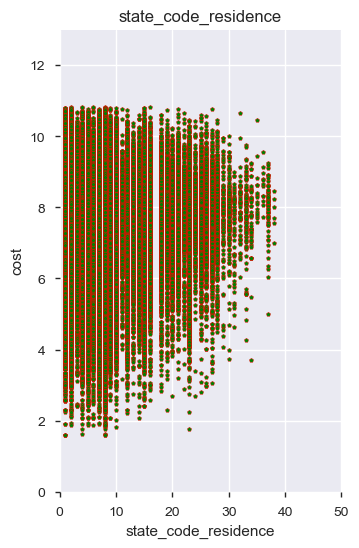

In [26]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(121)
ax.set(title = 'state_code_residence',xLabel = 'state_code_residence',yLabel = 'cost',xLim = (0,50),yLim = (0,13))
x1 = dft['state_code_residence']
y1 = dft['amount_spent_per_room_night_scaled']
ax.scatter(x1,y1,marker = 'p',c= ['green'],s=[10],edgecolor = 'red')
plt.show()

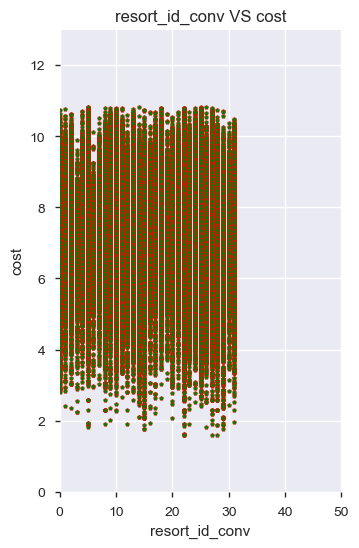

In [27]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(121)
ax.set(title = 'resort_id_conv VS cost',xLabel = 'resort_id_conv',yLabel = 'cost',xLim = (0,50),yLim = (0,13))
x1 = dft['resort_id_conv']
y1 = dft['amount_spent_per_room_night_scaled']
ax.scatter(x1,y1,marker = 'p',c= ['green'],s=[10],edgecolor = 'red')
plt.show()

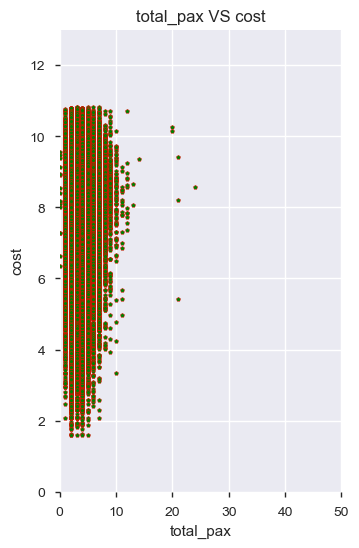

In [28]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(121)
ax.set(title = 'total_pax VS cost',xLabel = 'total_pax',yLabel = 'cost',xLim = (0,50),yLim = (0,13))
x1 = dft['total_pax']
y1 = dft['amount_spent_per_room_night_scaled']
ax.scatter(x1,y1,marker = 'p',c= ['green'],s=[10],edgecolor = 'red')
plt.show()

In [29]:
def state_code_trans(val):
    if val <= 10:
        return 1
    elif 10 < val <= 20:
        return 2
    elif 20 < val <= 30:
        return 3
    elif 30 < val <= 40:
        return 4
    else :
        return 5
    
dft['state_code_residence_conv'] = dft['state_code_residence'].apply(lambda k:state_code_trans(k))

In [30]:
dft[['state_code_residence_conv','state_code_residence']].head(10)

,state_code_residence_conv,state_code_residence
0,1,7.0
1,1,7.0
2,1,7.0
3,1,7.0
4,1,7.0
5,1,7.0
6,1,7.0
7,1,7.0
8,1,7.0
9,1,7.0


In [31]:
def total_pax_trans(val):
    if val <= 5:
        return 1
    elif 5 < val <= 10:
        return 2
    elif 10 < val <= 15:
        return 3
    else: 
        return 4
    
dft['total_pax_conv'] = dft['total_pax'].apply(lambda k:total_pax_trans(k))

In [32]:
dft[['total_pax_conv','total_pax']].head(10)

,total_pax_conv,total_pax
0,1,3
1,1,2
2,1,2
3,1,2
4,1,2
5,1,2
6,1,1
7,1,4
8,1,2
9,1,2


In [33]:
def resort_id_conv_trans(val):
    if val <= 10:
        return 1
    elif 10 < val <= 20:
        return 2
    elif 20 < val <= 30:
        return 3
    else :
        return 4
    
dft['resortId_Conv2'] = dft['resort_id_conv'].apply(lambda k:resort_id_conv_trans(k))

In [34]:
dft[['resortId_Conv2','resort_id_conv']].head(10)

,resortId_Conv2,resort_id_conv
0,1,7
1,1,1
2,1,9
3,3,25
4,3,25
5,3,22
6,4,31
7,3,22
8,1,0
9,1,9


In [35]:
dft.head(10)

,reservation_id,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,memberid,cluster_code,reservationstatusid_code,resort_id,amount_spent_per_room_night_scaled,bookingDat,bookingDt,checkinDat,checkinDt,checkoutDat,checkoutDt,PreBookDays,DaysSpent,prebookdays_conv,resort_id_conv,state_code_residence_conv,total_pax_conv,resortId_Conv2
0,07659f3758d8aee27f5a7e2887adeacb67021cb95ada1b...,05/04/18,05/04/18,06/04/18,3,1,2,0,46,3,3,3,1,2.0,7.0,3,3,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,C,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,7.706428,05-04-2018,2018-04-05,05-04-2018,2018-04-05,06-04-2018,2018-04-06,0,1,1,7,1,1,1
1,03930f033646d073462b35d411616323597715ac4fc398...,23/01/15,11/04/15,16/04/15,1,1,2,0,46,3,3,4,5,2.0,7.0,5,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,A,39fa9ec190eee7b6f4dff1100d6343e10918d044c75eac...,6.662563,23-01-2015,2015-01-23,11-04-2015,2015-04-11,16-04-2015,2015-04-16,78,5,3,1,1,1,1
2,d145a32920e6587ad95bfe299d80c0affa268220535aaf...,28/01/15,01/02/15,05/02/15,1,1,2,0,47,1,5,4,4,2.0,7.0,1,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,E,A,535fa30d7e25dd8a49f1536779734ec8286108d115da50...,7.871602,28-01-2015,2015-01-28,01-02-2015,2015-02-01,05-02-2015,2015-02-05,4,4,1,9,1,1,1
3,cfd77f44811ed62f25a220b53324cdbafc662a4c9e5f04...,02/05/15,11/06/15,16/06/15,1,1,2,2,46,2,2,3,5,2.0,7.0,2,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,5.344943,02-05-2015,2015-05-02,11-06-2015,2015-06-11,16-06-2015,2015-06-16,40,5,2,25,1,1,3
4,937cff9e4dcfc2459620153dfc8b9962ac22bea67dfb29...,02/09/15,14/12/15,19/12/15,1,1,2,0,46,2,2,4,5,2.0,7.0,2,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,7.059346,02-09-2015,2015-09-02,14-12-2015,2015-12-14,19-12-2015,2015-12-19,103,5,4,25,1,1,3
5,cc8f05558362b7589004e57044e8b558bd228fc70da5b0...,01/12/15,12/01/16,13/01/16,1,1,2,0,47,1,1,4,2,2.0,7.0,6,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,A,b17ef6d19c7a5b1ee83b907c595526dcb1eb06db8227d6...,8.167707,01-12-2015,2015-12-01,12-01-2016,2016-01-12,13-01-2016,2016-01-13,42,1,2,22,1,1,3
6,6827da5d76c626deeed81eb9f3afef635db4c17c9cbea0...,20/01/16,20/01/16,21/01/16,3,1,2,0,46,2,7,4,1,3.0,7.0,9,1,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,B,A,ff5a1ae012afa5d4c889c50ad427aaf545d31a4fac04ff...,6.449838,20-01-2016,2016-01-20,20-01-2016,2016-01-20,21-01-2016,2016-01-21,0,1,1,31,1,1,4
7,b89547398bfff6b8e99939fbeb20ddb55aa2e43ebce9e4...,22/08/16,20/10/16,25/10/16,1,1,2,2,46,1,1,2,5,3.0,7.0,6,4,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,A,b17ef6d19c7a5b1ee83b907c595526dcb1eb06db8227d6...,7.046172,22-08-2016,2016-08-22,20-10-2016,2016-10-20,25-10-2016,2016-10-25,59,5,2,22,1,1,3
8,3706793a0263706fe541b6e7f3b681be363f0b7e2bdc63...,10/09/16,18/09/16,24/09/16,1,1,2,0,45,2,4,3,6,4.0,7.0,10,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,B,A,0b918943df0962bc7a1824c0555a389347b4febdc7cf9d...,5.394203,10-09-2016,2016-09-10,18-09-2016,2016-09-18,24-09-2016,2016-09-24,8,6,1,0,1,1,1
9,1f797a715ff7788cc8162fb033ee0eca345a2209b27593...,03/08/16,21/11/16,24/11/16,1,1,2,0,45,1,5,4,4,3.0,7.0,1,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,E,A,535fa30d7e25dd8a49f1536779734ec8286108d115da50...,6.561412,03-08-2016,2016-08-03,21-11-2016,2016-11-21,24-11-2016,2016-11-24,110,3,4,9,1,1,1


In [36]:
req_col = ['channel_code','main_product_code','numberofadults','numberofchildren','persontravellingid','resort_region_code','resort_type_code','room_type_booked_code','roomnights','season_holidayed_code','state_code_resort','member_age_buckets','booking_type_code','cluster_code','reservationstatusid_code','DaysSpent','prebookdays_conv','state_code_residence_conv','total_pax_conv','resortId_Conv2','amount_spent_per_room_night_scaled']

In [37]:
df = dft[req_col]

In [38]:
h_prof = pandas_profiling.ProfileReport(df)
h_prof.to_file(outputfile="TrainFinalProfileoutput.html")

In [39]:
df.shape

(341412, 21)

In [40]:
y = df.iloc[:, [20]]
x = df.iloc[:, 0:20]

In [41]:
x.head()

,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,state_code_resort,member_age_buckets,booking_type_code,cluster_code,reservationstatusid_code,DaysSpent,prebookdays_conv,state_code_residence_conv,total_pax_conv,resortId_Conv2
0,3,1,2,0,46,3,3,3,1,2.0,3,F,1,F,C,1,1,1,1,1
1,1,1,2,0,46,3,3,4,5,2.0,5,F,1,F,A,5,3,1,1,1
2,1,1,2,0,47,1,5,4,4,2.0,1,F,1,E,A,4,1,1,1,1
3,1,1,2,2,46,2,2,3,5,2.0,2,F,1,D,A,5,2,1,1,3
4,1,1,2,0,46,2,2,4,5,2.0,2,F,1,D,A,5,4,1,1,3


In [42]:
y.head()

,amount_spent_per_room_night_scaled
0,7.706428
1,6.662563
2,7.871602
3,5.344943
4,7.059346


In [43]:
lb = LabelEncoder()
z = list(x.columns.values)
nz = ['numberofadults','numberofchildren','roomnights','DaysSpent','prebookdays_conv']

for ele in nz:
    z.remove(ele)
    
for name in z:
    x[name] = lb.fit_transform(x[name])

In [44]:
x.head(10)

,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,state_code_resort,member_age_buckets,booking_type_code,cluster_code,reservationstatusid_code,DaysSpent,prebookdays_conv,state_code_residence_conv,total_pax_conv,resortId_Conv2
0,2,0,2,0,1,2,3,2,1,1,2,5,0,5,2,1,1,0,0,0
1,0,0,2,0,1,2,3,3,5,1,4,5,0,5,0,5,3,0,0,0
2,0,0,2,0,2,0,5,3,4,1,0,5,0,4,0,4,1,0,0,0
3,0,0,2,2,1,1,2,2,5,1,1,5,0,3,0,5,2,0,0,2
4,0,0,2,0,1,1,2,3,5,1,1,5,0,3,0,5,4,0,0,2
5,0,0,2,0,2,0,1,3,2,1,5,5,0,5,0,1,2,0,0,2
6,2,0,2,0,1,1,6,3,1,2,7,5,0,1,0,1,1,0,0,3
7,0,0,2,2,1,0,1,1,5,2,5,5,0,5,0,5,2,0,0,2
8,0,0,2,0,0,1,4,2,6,3,8,5,0,1,0,6,1,0,0,0
9,0,0,2,0,0,0,5,3,4,2,0,5,0,4,0,3,4,0,0,0


In [45]:
x[['roomnights','DaysSpent']].head(20)

,roomnights,DaysSpent
0,1,1
1,5,5
2,4,4
3,5,5
4,5,5
5,2,1
6,1,1
7,5,5
8,6,6
9,4,3


In [46]:
x.columns.values

array(['channel_code', 'main_product_code', 'numberofadults',
       'numberofchildren', 'persontravellingid', 'resort_region_code',
       'resort_type_code', 'room_type_booked_code', 'roomnights',
       'season_holidayed_code', 'state_code_resort', 'member_age_buckets',
       'booking_type_code', 'cluster_code', 'reservationstatusid_code',
       'DaysSpent', 'prebookdays_conv', 'state_code_residence_conv',
       'total_pax_conv', 'resortId_Conv2'], dtype=object)

In [47]:
col_names = np.array('B0')

In [48]:
col_names =np.append(arr = col_names,values = x.columns.values)

In [49]:
print(col_names)

['B0' 'channel_code' 'main_product_code' 'numberofadults'
 'numberofchildren' 'persontravellingid' 'resort_region_code'
 'resort_type_code' 'room_type_booked_code' 'roomnights'
 'season_holidayed_code' 'state_code_resort' 'member_age_buckets'
 'booking_type_code' 'cluster_code' 'reservationstatusid_code' 'DaysSpent'
 'prebookdays_conv' 'state_code_residence_conv' 'total_pax_conv'
 'resortId_Conv2']


In [50]:
x1 = np.append(arr= (np.ones((x.shape[0],1))).astype(int),values=x,axis=1)

In [51]:
df_n = pd.DataFrame(data = x1,
                   columns = col_names)

In [52]:
del dft,df

In [53]:
df_n['channel_code'].unique()

array([2, 0, 1], dtype=int64)

In [54]:
ch_df = pd.get_dummies(df_n['channel_code'])

In [55]:
ch_df.columns = ['chcode'+str(c) for c in ch_df.columns]

In [56]:
ch_df.head()

,chcode0,chcode1,chcode2
0,0,0,1
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [57]:
ch_df = ch_df.iloc[:,1:]

In [58]:
mp_df = pd.get_dummies(df_n['main_product_code'])

In [59]:
mp_df.head()

,0,1,2,3,4
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0


In [60]:
mp_df.columns = ['main_product'+str(c) for c in mp_df.columns]

In [61]:
mp_df.head()

,main_product0,main_product1,main_product2,main_product3,main_product4
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0


In [62]:
mp_df = mp_df.iloc[:,1:]

In [63]:
pid_df = pd.get_dummies(df_n['persontravellingid'])

In [64]:
pid_df.head()

,0,1,2,3,4,5
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,0,0,1,0,0,0
3,0,1,0,0,0,0
4,0,1,0,0,0,0


In [65]:
pid_df.columns = ['pid'+str(c) for c in pid_df.columns]

In [66]:
pid_df.head()

,pid0,pid1,pid2,pid3,pid4,pid5
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,0,0,1,0,0,0
3,0,1,0,0,0,0
4,0,1,0,0,0,0


In [67]:
pid_df = pid_df.iloc[:,1:]

In [68]:
resreg_df = pd.get_dummies(df_n['resort_region_code'])

In [69]:
resreg_df.head()

,0,1,2
0,0,0,1
1,0,0,1
2,1,0,0
3,0,1,0
4,0,1,0


In [70]:
resreg_df.columns = ['resortregion'+str(c) for c in resreg_df.columns]

In [71]:
resreg_df.head()

,resortregion0,resortregion1,resortregion2
0,0,0,1
1,0,0,1
2,1,0,0
3,0,1,0
4,0,1,0


In [72]:
resreg_df = resreg_df.iloc[:,1:]

In [73]:
restyp_df = pd.get_dummies(df_n['resort_type_code'])

In [74]:
restyp_df.head()

,0,1,2,3,4,5,6
0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,0
2,0,0,0,0,0,1,0
3,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0


In [75]:
restyp_df.columns = ['restyp'+str(c) for c in restyp_df.columns]

In [76]:
restyp_df.head()

,restyp0,restyp1,restyp2,restyp3,restyp4,restyp5,restyp6
0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,0
2,0,0,0,0,0,1,0
3,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0


In [77]:
restyp_df = restyp_df.iloc[:,1:]

In [78]:
room_df = pd.get_dummies(df_n['room_type_booked_code'])

In [79]:
room_df.head()

,0,1,2,3,4,5
0,0,0,1,0,0,0
1,0,0,0,1,0,0
2,0,0,0,1,0,0
3,0,0,1,0,0,0
4,0,0,0,1,0,0


In [80]:
room_df.columns = ['roomtyp'+str(c) for c in room_df.columns]

In [81]:
room_df.head()

,roomtyp0,roomtyp1,roomtyp2,roomtyp3,roomtyp4,roomtyp5
0,0,0,1,0,0,0
1,0,0,0,1,0,0
2,0,0,0,1,0,0
3,0,0,1,0,0,0
4,0,0,0,1,0,0


In [82]:
room_df = room_df.iloc[:,1:]

In [83]:
season_df = pd.get_dummies(df_n['season_holidayed_code'])

In [84]:
season_df.head()

,0,1,2,3
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


In [85]:
season_df.columns = ['season'+str(c) for c in season_df.columns]

In [86]:
season_df.head()

,season0,season1,season2,season3
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


In [87]:
season_df = season_df.iloc[:,1:]

In [88]:
statecode_df = pd.get_dummies(df_n['state_code_resort'])

In [89]:
statecode_df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0


In [90]:
statecode_df.columns = ['statecode'+str(c) for c in statecode_df.columns]

In [91]:
statecode_df.head()

,statecode0,statecode1,statecode2,statecode3,statecode4,statecode5,statecode6,statecode7,statecode8,statecode9,statecode10
0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0


In [92]:
statecode_df = statecode_df.iloc[:,1:]

In [93]:
age_df  = pd.get_dummies(df_n['member_age_buckets'])

In [94]:
age_df.head()

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0


In [95]:
age_df.columns = ['age'+str(c) for c in age_df.columns]

In [96]:
age_df.head()

,age0,age1,age2,age3,age4,age5,age6,age7,age8,age9
0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0


In [97]:
age_df = age_df.iloc[:,1:]

In [98]:
cluster_df = pd.get_dummies(df_n['cluster_code'])

In [99]:
cluster_df.head()

,0,1,2,3,4,5
0,0,0,0,0,0,1
1,0,0,0,0,0,1
2,0,0,0,0,1,0
3,0,0,0,1,0,0
4,0,0,0,1,0,0


In [100]:
cluster_df.columns = ['cluster'+str(c) for c in cluster_df.columns]

In [101]:
cluster_df.head()

,cluster0,cluster1,cluster2,cluster3,cluster4,cluster5
0,0,0,0,0,0,1
1,0,0,0,0,0,1
2,0,0,0,0,1,0
3,0,0,0,1,0,0
4,0,0,0,1,0,0


In [102]:
cluster_df = cluster_df.iloc[:,1:]

In [103]:
reservation_df = pd.get_dummies(df_n['reservationstatusid_code'])

In [104]:
reservation_df.head()

,0,1,2,3
0,0,0,1,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [105]:
reservation_df.columns = ['reservation'+str(c) for c in reservation_df.columns]

In [106]:
reservation_df.head()

,reservation0,reservation1,reservation2,reservation3
0,0,0,1,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [107]:
reservation_df = reservation_df.iloc[:,1:]

In [108]:
state_code_df = pd.get_dummies(df_n['state_code_residence_conv'])

In [109]:
state_code_df.head()

,0,1,2,3
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [110]:
state_code_df.columns = ['state_code'+str(c) for c in state_code_df.columns]

In [111]:
state_code_df.head()

,state_code0,state_code1,state_code2,state_code3
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [112]:
state_code_df = state_code_df.iloc[:,1:]

In [113]:
total_pax_df = pd.get_dummies(df_n['total_pax_conv'])

In [114]:
total_pax_df.head()

,0,1,2,3
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [115]:
total_pax_df.columns = ['total_pax'+str(c) for c in total_pax_df.columns]

In [116]:
total_pax_df.head()

,total_pax0,total_pax1,total_pax2,total_pax3
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [117]:
total_pax_df = total_pax_df.iloc[:,1:]

In [118]:
resortid_df = pd.get_dummies(df_n['resortId_Conv2'])

In [119]:
resortid_df.head()

,0,1,2,3
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,0,0,1,0
4,0,0,1,0


In [120]:
resortid_df.columns = ['resortid'+str(c) for c in resortid_df.columns]

In [121]:
resortid_df.head()

,resortid0,resortid1,resortid2,resortid3
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,0,0,1,0
4,0,0,1,0


In [122]:
resortid_df = resortid_df.iloc[:,1:]

In [123]:
ch_df.head()

,chcode1,chcode2
0,0,1
1,0,0
2,0,0
3,0,0
4,0,0


In [124]:
df_m = pd.concat([df_n,ch_df,mp_df,pid_df,resreg_df,restyp_df,room_df,season_df,statecode_df,age_df,cluster_df,reservation_df,state_code_df,total_pax_df,resortid_df],axis = 1)

In [125]:
df_m.head()

,B0,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,state_code_resort,member_age_buckets,booking_type_code,cluster_code,reservationstatusid_code,DaysSpent,prebookdays_conv,state_code_residence_conv,total_pax_conv,resortId_Conv2,chcode1,chcode2,main_product1,main_product2,main_product3,main_product4,pid1,pid2,pid3,pid4,pid5,resortregion1,resortregion2,restyp1,restyp2,restyp3,restyp4,restyp5,restyp6,roomtyp1,roomtyp2,roomtyp3,roomtyp4,roomtyp5,season1,season2,season3,statecode1,statecode2,statecode3,statecode4,statecode5,statecode6,statecode7,statecode8,statecode9,statecode10,age1,age2,age3,age4,age5,age6,age7,age8,age9,cluster1,cluster2,cluster3,cluster4,cluster5,reservation1,reservation2,reservation3,state_code1,state_code2,state_code3,total_pax1,total_pax2,total_pax3,resortid1,resortid2,resortid3
0,1,2,0,2,0,1,2,3,2,1,1,2,5,0,5,2,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0,0,2,0,1,2,3,3,5,1,4,5,0,5,0,5,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,2,0,2,0,5,3,4,1,0,5,0,4,0,4,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,2,2,1,1,2,2,5,1,1,5,0,3,0,5,2,0,0,2,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1,0,0,2,0,1,1,2,3,5,1,1,5,0,3,0,5,4,0,0,2,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [126]:
df_m.drop(labels= ['channel_code','main_product_code','persontravellingid','resort_region_code','resort_type_code','room_type_booked_code','season_holidayed_code','state_code_resort','cluster_code','reservationstatusid_code','state_code_residence_conv','total_pax_conv','resortId_Conv2'],axis= 1,inplace=True)

In [127]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_m, y, test_size=0.2, random_state=0)

In [128]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)
y_pred = regressor.predict(x_test)

In [129]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.7444532608785553
1.017349630956113
1.0086375121698146


In [130]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(x_train,y_train)
y_pred = regressor.predict(x_test)

In [131]:
print(metrics.mean_absolute_error(y_test,y_pred))

1.048199667932484


In [132]:
print(metrics.mean_squared_error(y_test,y_pred))

2.035252306413601


In [133]:
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

1.4266226923800143


In [134]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(x_train,y_train)
y_pred = regressor.predict(x_test)

c:\program files (x86)\python36-32\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\program files (x86)\python36-32\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [135]:
print(metrics.mean_squared_error(y_test,y_pred))

1.2237835263195251


In [136]:
print(metrics.mean_squared_error(y_test,y_pred))

1.2237835263195251


In [137]:
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

1.106247497768707
